In [1]:
import pandas as pd
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Needed for the race data calculation

# --- Reads in data ---
df = pd.read_csv('./data/nationaldatabaseofchildcareprices.csv')


print("Quick Summary stats:")
print(df.describe()) # Quick Summary stats
print("-" * 50)

print("Missing values in each column:")
# Pandas equivalent of: df.select([pl.col(c).is_null().sum().alias(c) for c in df.columns])
missing_values = df.isnull().sum()
# The next line is the Pandas equivalent of the Polars logic (single row DataFrame, then dict list)
missing_values_df = missing_values.to_frame().T
print(missing_values_df.to_dict(orient='records')) # finds missing data counts
print("-" * 50)


# ## 1. Explore how childcare costs have changed over time across different states and counties

# Aggregate childcare costs by year, state, and county
df_childcare_costs = df.groupby(['StudyYear', 'State_Name', 'County_Name']).agg(
    Average_MCInfant=('MCInfant', 'mean'),
    Average_MCToddler=('MCToddler', 'mean'),
    Average_MCPreschool=('MCPreschool', 'mean')
).reset_index().sort_values(by="StudyYear") # .reset_index() turns the groupby keys back into columns

print("\nChildcare Costs Aggregation Head:")
print(df_childcare_costs.head())


# ## 2. Analyze Trends on Income, Unemployment, Male/Female Labor force

df_trends = df.groupby(['State_Name', 'County_Name']).agg(
    Average_MHI=('MHI', 'mean'),
    Average_FLFPR_20to64=('FLFPR_20to64', 'mean'),
    Average_MLFPR_20to64=('MLFPR_20to64', 'mean'),
    Average_UNR_20to64=('UNR_20to64', 'mean')
).reset_index() # Pandas agg uses dictionary mapping for new column names



# Create a scatter plot matrix
sns.pairplot(df_trends[['Average_MHI', 'Average_FLFPR_20to64', 'Average_MLFPR_20to64', 'Average_UNR_20to64']])
plt.suptitle('Scatter Plot Matrix of Economic and Labor Trends', y=1.02)
plt.show()



Quick Summary stats:
       County_FIPS_Code     StudyYear        UNR_16       FUNR_16  \
count      34567.000000  34567.000000  34567.000000  34567.000000   
mean       30388.132786   2012.999711      7.470498      7.034122   
std        15161.015383      3.162232      3.538497      3.563366   
min         1001.000000   2008.000000      0.000000      0.000000   
25%        18177.000000   2010.000000      5.100000      4.600000   
50%        29177.000000   2013.000000      7.100000      6.600000   
75%        45081.000000   2016.000000      9.400000      8.900000   
max        56045.000000   2018.000000     36.100000     38.200000   

            MUNR_16    UNR_20to64   FUNR_20to64   MUNR_20to64  FLFPR_20to64  \
count  34567.000000  34567.000000  34567.000000  34567.000000  34567.000000   
mean       7.865123      6.900289      6.482127      7.275642     70.086201   
std        4.037851      3.446106      3.477929      3.990732      7.696422   
min        0.000000      0.000000      0.

TypeError: agg function failed [how->mean,dtype->object]

In [2]:

# ## 3. Impact of High Childcare Costs (Infant) on Demographics

df_impact = df[['State_Name', 'County_Name', 'MCInfant', 'MHI', 'FLFPR_20to64']].groupby(
    ['State_Name', 'County_Name']
).agg(
    Average_MCInfant=('MCInfant', 'mean'),
    Average_MHI=('MHI', 'mean'),
    Average_FLFPR_20to64=('FLFPR_20to64', 'mean')
).reset_index()

# Create a scatter plot matrix
sns.pairplot(df_impact[['Average_MCInfant', 'Average_MHI', 'Average_FLFPR_20to64']])
plt.suptitle('Scatter Plot Matrix of Average MCInfant, MHI, and FLFPR_20to64', y=1.02)
plt.show()



TypeError: agg function failed [how->mean,dtype->object]

C:\Users\gyanr\AppData\Local\Temp\ipykernel_10984\2807579795.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Racial Group', y='Count', data=race_counts_df, palette='Blues')


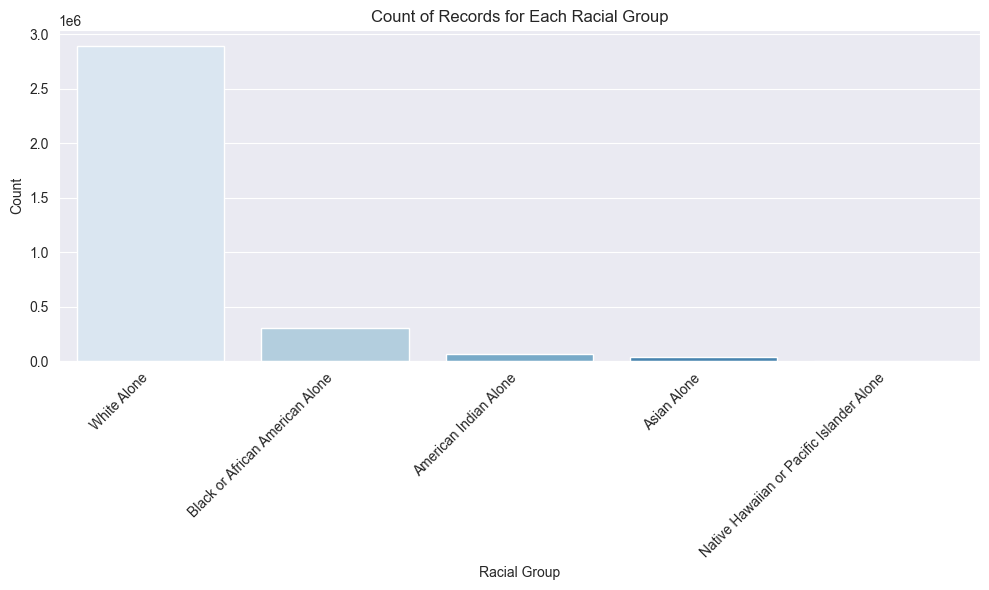

In [3]:

# ## 4. Relationships with Race

# Sum of Race Counts. Pandas sum() automatically handles NaNs and numeric conversion
race_counts = {
    'White Alone': df['OneRace_W'].sum(),
    'Black or African American Alone': df['OneRace_B'].sum(),
    'American Indian Alone': df['OneRace_I'].sum(),
    'Asian Alone': df['OneRace_A'].sum(),
    'Native Hawaiian or Pacific Islander Alone': df['OneRace_H'].sum()
}

# Convert dictionary to Pandas DataFrame
race_counts_df = pd.DataFrame(list(race_counts.items()), columns=['Racial Group', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Racial Group', y='Count', data=race_counts_df, palette='Blues')
plt.xlabel('Racial Group')
plt.ylabel('Count')
plt.title('Count of Records for Each Racial Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


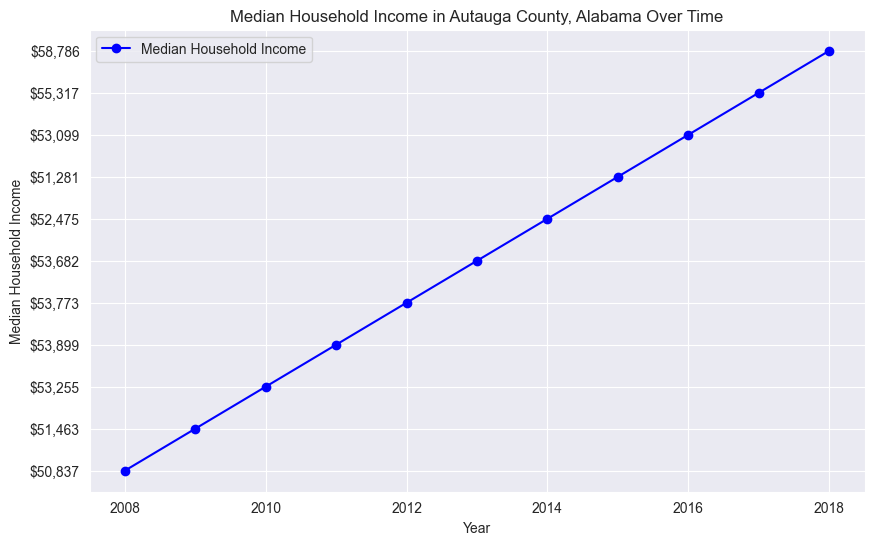

In [4]:


# Filter relevant columns
df_filtered = df[['State_Name', 'County_Name', 'StudyYear', 'MHI']]

# Plotting Median Household Income (MHI) over the years
state = "Alabama"
county = "Autauga County"

df_plot = df_filtered[
    (df_filtered['State_Name'] == state) &
    (df_filtered['County_Name'] == county)
    ]

plt.figure(figsize=(10, 6))
plt.plot(df_plot['StudyYear'], df_plot['MHI'], marker='o', color='b', label='Median Household Income')
plt.title(f'Median Household Income in {county}, {state} Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.grid(True)
plt.legend()
plt.show()


In [5]:

# Selecting a subset of the data to use for the visualizations
df_filtered = df[[
    "State_Name", "County_Name", "StudyYear",
    "MHI", "TotalPop", "OneRace_W", "OneRace_B",
    "FLFPR_20to64", "MLFPR_20to64"
]]

# Bar Plot: Median Household Income (MHI) by State
mhi_by_state = df_filtered.groupby("State_Name").agg(
    Avg_MHI=("MHI", "mean")
).reset_index() # Use reset_index() to turn State_Name back into a column

plt.figure(figsize=(10, 6))
sns.barplot(x='State_Name', y='Avg_MHI', data=mhi_by_state, palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Average Median Household Income by State')
plt.xlabel('State')
plt.ylabel('Average MHI')
plt.tight_layout()
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [6]:

# Clean and prepare the data for visualization
# Selecting different columns for the heatmap
df_filtered = df[[
    "State_Name", "County_Name", "StudyYear",
    "FUNR_16", "MUNR_16", "PR_F", "PR_P",
    "MHI", "TotalPop"
]]

# Heatmap: Correlation between Unemployment, Poverty Rates, Income, and Population
df_corr = df_filtered[[
    "FUNR_16", "MUNR_16", "PR_F", "PR_P",
    "MHI", "TotalPop"
]].corr() # Pandas correlation method

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Between Unemployment, Poverty, Income, and Population')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '$50,837'

In [7]:
# %pip install pandas altair vegafusion

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
df = pd.read_csv('./data/nationaldatabaseofchildcareprices.csv')
